### Traffic simulation with OSMnx and UXsim
- [OSMnx](https://www.github.com/gboeing/osmnx)
- [UXsim](https://www.github.com/toruseo/uxsim)

In [1]:
import osmnx as ox
import random
import uxsim
from IPython.display import display, Image

In [2]:
# Create a graph from a place name
place_name = "Delft, Netherlands"
custom_filter = (
    '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|'
    'secondary|secondary_link|tertiary|tertiary_link"]'
)
original_graph = ox.graph_from_place(place_name, network_type="drive", simplify=False, custom_filter=custom_filter)

In [3]:
# Add speed limits and travel times to the edges
original_graph = ox.add_edge_speeds(original_graph)
original_graph = ox.add_edge_travel_times(original_graph)

In [4]:
# Convert edges to geodataframe
edges = ox.graph_to_gdfs(original_graph, nodes=False, edges=True)
# Remove the junction NaN values
edges = edges[edges["junction"].notna()]

# print the unique values of the junction column
print(edges["junction"].unique())
edges.head(5)

['roundabout' 'intersection']


,,,osmid,lanes,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,ref,bridge,width,junction,geometry
u,v,key,,,,,,,,,,,,,,,
559635297,561617715,0,332198805,1,NaN,tertiary,50,True,False,2.473,50.0,0.2,NaN,NaN,NaN,roundabout,"LINESTRING (4.34250 52.00164, 4.34253 52.00163)"
559635298,559635297,0,332198805,1,NaN,tertiary,50,True,False,2.479,50.0,0.2,NaN,NaN,NaN,roundabout,"LINESTRING (4.34247 52.00165, 4.34250 52.00164)"
559635299,559635298,0,332198805,1,NaN,tertiary,50,True,False,2.464,50.0,0.2,NaN,NaN,NaN,roundabout,"LINESTRING (4.34244 52.00167, 4.34247 52.00165)"
559635300,561617625,0,332198805,1,NaN,tertiary,50,True,False,3.151,50.0,0.2,NaN,NaN,NaN,roundabout,"LINESTRING (4.34272 52.00173, 4.34271 52.00176)"
559635302,561617738,0,332198805,1,NaN,tertiary,50,True,False,3.144,50.0,0.2,NaN,NaN,NaN,roundabout,"LINESTRING (4.34270 52.00167, 4.34272 52.00170)"


In [5]:
# Print number of nodes and edges
print(len(original_graph.nodes), len(original_graph.edges))

3522 4524


In [6]:
# Simplify the graph
graph = ox.simplify_graph(original_graph, endpoint_attrs=["speed_kph"])

# Print number of nodes and edges
print(len(graph.nodes), len(graph.edges))

405 684


In [7]:
# Convert edges to geodataframe
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
edges.head(5)

,,,osmid,oneway,lanes,ref,highway,maxspeed,reversed,length,speed_kph,travel_time,geometry,name,bridge,width,junction
u,v,key,,,,,,,,,,,,,,,
44639032,1402598708,0,"[7531946, 300815642, 1091308322]",True,"[4, 5]",A13,motorway,100,False,1784.004,100.0,64.2,"LINESTRING (4.40346 51.96663, 4.40195 51.96856...",NaN,NaN,NaN,NaN
44702815,44641035,0,"[126548650, 1092382247]",True,"[4, 3]",A13,motorway,100,False,1508.756,100.0,54.4,"LINESTRING (4.39621 51.97934, 4.39725 51.97691...",NaN,NaN,NaN,NaN
44731563,4474353180,0,450505725,True,4,NaN,tertiary,80,False,43.072,80.0,1.9,"LINESTRING (4.34440 51.98519, 4.34440 51.98530...",Buitenhofdreef,NaN,NaN,NaN
44732899,1402771623,0,142823215,True,4,NaN,tertiary,80,False,38.939,80.0,1.8,"LINESTRING (4.34409 51.98555, 4.34407 51.98546...",Buitenhofdreef,NaN,NaN,NaN
44736283,44753930,0,"[131635850, 131635851, 450505045, 450505046, 7...",True,"[3, 2, 1]",NaN,tertiary,50,False,407.263,50.0,29.3,"LINESTRING (4.34471 51.98639, 4.34479 51.98655...",Buitenhofdreef,NaN,NaN,NaN


In [8]:
print(edges.columns.tolist())

['osmid', 'oneway', 'lanes', 'ref', 'highway', 'maxspeed', 'reversed', 'length', 'speed_kph', 'travel_time', 'geometry', 'name', 'bridge', 'width', 'junction']


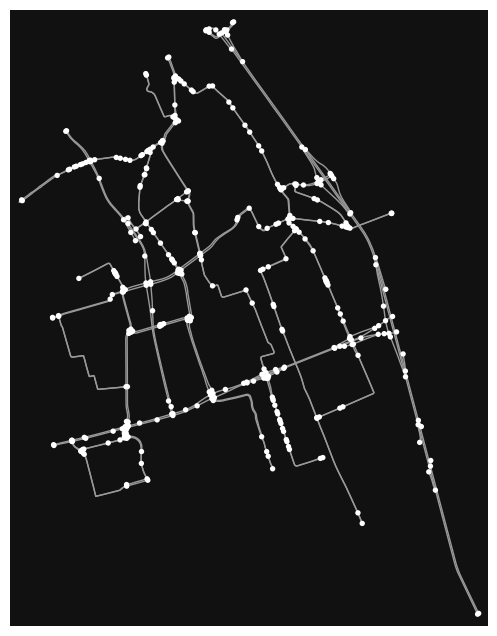

In [9]:
# Plot the graph
fig, ax = ox.plot_graph(graph)

### UXsim model

In [10]:
# Initialize the simulation environment (World)

# Set simulation parameters
simulation_name = "MyUXsimWorld"
simulation_duration = 7200  # in seconds (e.g., 1 hour)
platoon_size = 5  # vehicles per platoon
reaction_time = 1  # in seconds
duo_update_time = 300  # in seconds, for dynamic user equilibrium (DUO) route choice update
duo_update_weight = 0.5  # weight for DUO update
duo_noise = 0.01  # noise for DUO route choice to prevent identical choices
eular_dt = 120  # in seconds, for Eulerian traffic state computation
eular_dx = 100  # in meters, for Eulerian traffic state computation
random_seed = 42  # for reproducibility

# Create the World object with the specified parameters
world = uxsim.World(name=simulation_name,
              deltan=platoon_size,
              reaction_time=reaction_time,
              duo_update_time=duo_update_time,
              duo_update_weight=duo_update_weight,
              duo_noise=duo_noise,
              eular_dt=eular_dt,
              eular_dx=eular_dx,
              random_seed=random_seed,
              print_mode=1,  # Enable printing simulation progress
              save_mode=1,  # Enable saving simulation results
              show_mode=0,  # Disable showing results via matplotlib (for faster performance)
              route_choice_principle="homogeneous_DUO",
              show_progress=1,  # Show simulation progress
              show_progress_deltat=600,  # Interval for showing progress, in seconds
              tmax=simulation_duration)  # Total simulation duration

In [11]:
# Helper function to determine max density based on road type and number of lanes
def calculate_max_density(road_type):
    default_density = 0.15  # Default maximum density in vehicles per meter per lane
    if road_type in ['motorway', 'trunk']:
        return 0.07  # Lower density due to higher speeds and longer headways
    elif road_type in ['primary', 'secondary']:
        return 0.10
    elif road_type in ['residential', 'tertiary']:
        return 0.20  # Higher density due to lower speeds
    else:
        return default_density  # Default for unspecified or other road types

In [12]:
# Create Nodes in UXsim from OSMnx graph nodes
for node_id, data in graph.nodes(data=True):
    world.addNode(name=str(node_id), x=data['x'], y=data['y'])

# Create Links in UXsim from OSMnx graph edges
for u, v, data in graph.edges(data=True):
    start_node_name = str(u)
    end_node_name = str(v)
    length = data['length']  # Assuming 'length' attribute exists
    # Assuming 'speed' attribute exists, convert speed from km/h to m/s
    speed_limit = data.get('speed', 30) * 1000 / 3600  # Default speed: 30 km/h
    # Calculate max density based on road type and lanes
    road_type = data.get('highway', '')
    max_density = calculate_max_density(road_type)
    priority = 1  # Example value
    world.addLink(name=f"{u}_{v}", start_node=start_node_name, end_node=end_node_name, length=length, free_flow_speed=speed_limit, jam_density=max_density, merge_priority=priority)

In [13]:
# Assuming 'world' is your UXsim world and it has been populated with nodes and links as per previous steps
nodes = [node.name for node in world.NODES]  # List of node names

for orig_node in nodes:
    # Exclude the origin node from potential destinations
    potential_dests = [node for node in nodes if node != orig_node]
    
    for _ in range(8):  # Create n trips from each node
        dest_node = random.choice(potential_dests)  # Randomly choose a destination
        departure_time = random.uniform(0, simulation_duration*0.5)  # Random departure time within the first half of the simulation
        
        # Add a vehicle for this trip
        world.addVehicle(orig=orig_node, dest=dest_node, departure_time=departure_time)
print(f"Added {len(world.VEHICLES)} vehicles to the simulation")

Added 3240 vehicles to the simulation


In [14]:
# Finalize the scenario after adding all vehicles
world.finalize_scenario()

simulation setting:
 scenario name: MyUXsimWorld
 simulation duration:	 7200 s
 number of vehicles:	 16200 veh
 total road length:	 112529.1200000001 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 1440
 number of platoons:	 3240
 number of links:	 684
 number of nodes:	 405
 setup time:		 0.35 s
simulating...


In [15]:
# Run the simulation to completion
while world.check_simulation_ongoing():
    world.exec_simulation(duration_t=simulation_duration)

      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.01 s
     600 s|     1755 vehs|   5.1 m/s|     3.76 s
    1200 s|     2805 vehs|   4.2 m/s|     6.91 s
    1800 s|     3440 vehs|   4.0 m/s|    10.24 s
    2400 s|     4220 vehs|   3.6 m/s|    13.51 s
    3000 s|     5330 vehs|   3.2 m/s|    16.85 s
    3600 s|     6195 vehs|   2.3 m/s|    20.10 s
    4200 s|     4960 vehs|   2.7 m/s|    23.42 s
    4800 s|     3520 vehs|   3.8 m/s|    26.36 s
    5400 s|     1915 vehs|   5.2 m/s|    29.23 s
    6000 s|      970 vehs|   5.9 m/s|    31.88 s
    6600 s|      390 vehs|   5.6 m/s|    34.25 s
    7195 s|      285 vehs|   4.4 m/s|    35.78 s
 simulation finished


In [16]:
# Generate the animation with a resolution of 30 seconds
# This means each frame in the animation represents the network state at a specific 30-second interval
world.analyzer.network_anim(animation_speed_inverse=10, detailed=0, minwidth=0.5, maxwidth=12, left_handed=0, figsize=(12,12), node_size=2, network_font_size=1, timestep_skip=24)

# The above method call assumes default values for some parameters that you might want to adjust
# The `timestep_skip` parameter is set to 30, corresponding to the desired 30-second resolution

 generating animation...


  0%|          | 0/60 [00:00<?, ?it/s]

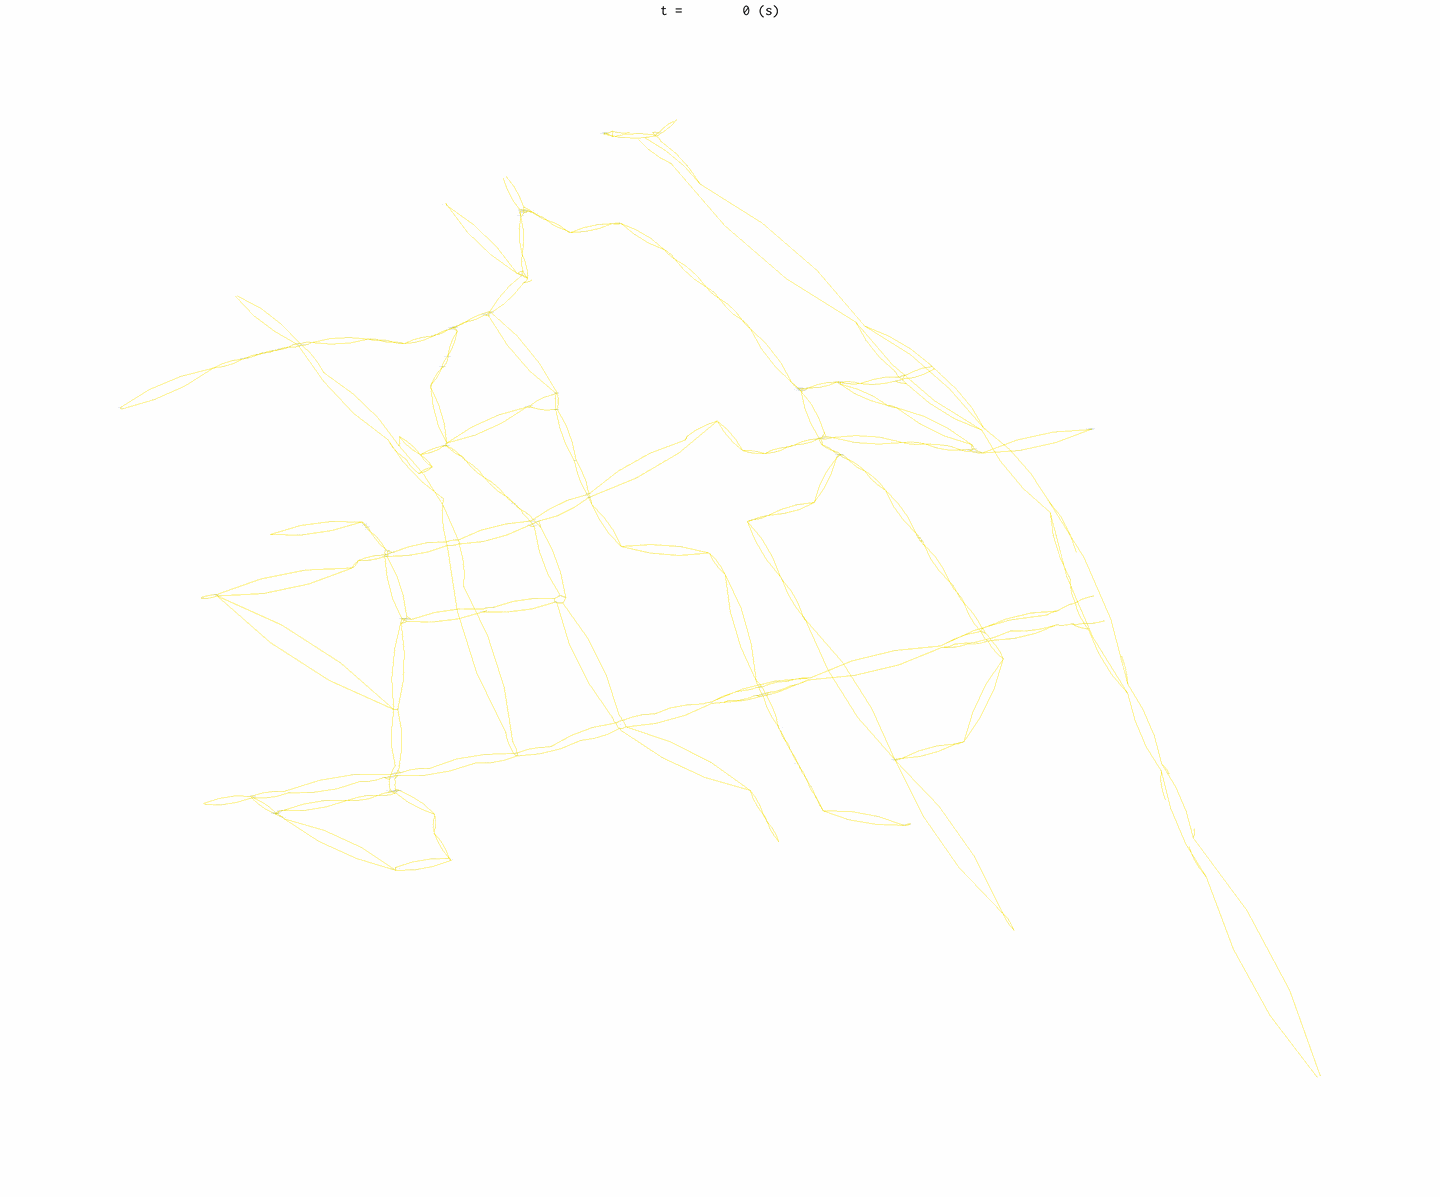

In [17]:
with open("outMyUXsimWorld/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='gif'))